In [1]:
# Class of k-Nearest Neigbor Classifier


class kNN():
    def __init__(self, k = 3, exp = 2):
    # constructor for kNN classifier 
    # k is the number of neighbor for local class estimation
    # exp is the exponent for the Minkowski distance
        self.k = k
        self.exp = exp
      
    def fit(self, X_train, Y_train):
    # training k-NN method
    # X_train is the training data given with input attributes. n-th row correponds to n-th instance.
    # Y_train is the output data (output vector): n-th element of Y_train is the output value for n-th instance in X_train.
        self.X_train = X_train
        self.Y_train = Y_train   
         
    def getDiscreteClassification(self, X_test):
    # predict-class k-NN method
    # X_test is the test data given with input attributes. Rows correpond to instances
    # Method outputs prediction vector Y_pred_test:  n-th element of Y_pred_test is the prediction for n-th instance in X_test
    
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []

   
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # Note that the index df_knn.index of df_knn contains indices in Y_train of the k-closed training instances to 
            # the i-th test instance. Thus, the dataframe self.Y_train[df_knn.index] contains the classes of those k-closed 
            # training instances. Method value_counts() computes the counts (number of occurencies) for each class in 
            # self.Y_train[df_knn.index] in dataframe predictions. 
            predictions = self.Y_train[df_knn.index].value_counts()
                 
            # the first element of the index predictions.index contains the class with the highest count; i.e. the prediction y_pred_test.
            y_pred_test = predictions.index[0]

            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test

    
    def Minkowski_distance(self, x1, x2):
    # computes the Minkowski distance of x1 and x2 for two labeled instances (x1,y1) and (x2,y2)
    
        # Set initial distance to 0
        distance = 0
    
        # Calculate Minkowski distance using the exponent exp
        for i in range(len(x1)):
            distance = distance + abs(x1[i] - x2[i])**self.exp
        
        distance = distance**(1/self.exp)
    
        return distance
   

    #### PART B
    
    def normalize(self, X_train, X_test):
    # normalizes the input attributes of the training data X_train and test data X_test
    
        # Formula for normalization using min-max
        df_train_normalized=(X_train-X_train.min())/(X_train.max()-X_train.min())
        df_test_normalized=(X_test-X_test.min())/(X_test.max()-X_test.min())
        
        return df_train_normalized, df_test_normalized
    
    
    #### PART C
    
    def getClassProbs(self, X_test):
    # computes for all the test instances in X_test the posterior class probabilities
      
        Y_pred_test = []
   
        for i in range(len(X_test)):  
            test_instance = X_test.iloc[i] 
            
            distances = []
          
            for j in range(len(self.X_train)):  
                train_instance = self.X_train.iloc[j] 
                distance = self.Minkowski_distance(test_instance, train_instance) 
                distances.append(distance) 
    
    
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
           
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            predictions = self.Y_train[df_knn.index].value_counts()
                
            y_pred_test = predictions/self.k

            Y_pred_test.append(y_pred_test)
        
        return pd.concat(Y_pred_test, axis=1).T.fillna(0.0)
    

    #### PART D
    
    def getPrediction(self, X_test):
    # computes for all the test instances in X_test regression values for the output attribute
       
        Y_pred_test = []
   
        for i in range(len(X_test)):  
            test_instance = X_test.iloc[i] 
            
            distances = []
          
            for j in range(len(self.X_train)):  
                train_instance = self.X_train.iloc[j] 
                distance = self.Minkowski_distance(test_instance, train_instance) 
                distances.append(distance) 
    
    
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
           
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            predictions = self.Y_train[df_knn.index].sum()
            
            y_pred_test = predictions/self.k

            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test
        

**Part B**

Text(0, 0.5, 'Accuracy')

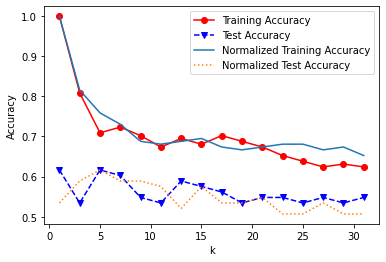

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.random import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##################################################
# Hold-out testing: Training and Test set creation
# Glass data
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))
trainAcc_normalized = np.zeros(len(k_range))
testAcc_normalized = np.zeros(len(k_range))


index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)    
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)

    #Data is normalized
    X_train_normalized, X_test_normalized = clf.normalize(X_train, X_test)
    clf.fit(X_train_normalized, Y_train)
    Y_predTrain_normalized = clf.getDiscreteClassification(X_train_normalized)
    Y_predTest_normalized = clf.getDiscreteClassification(X_test_normalized)    
    trainAcc_normalized[index] = accuracy_score(Y_train, Y_predTrain_normalized)
    testAcc_normalized[index] = accuracy_score(Y_test, Y_predTest_normalized)
    
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.plot(k_range,trainAcc_normalized,'-',k_range,testAcc_normalized,':')
plt.legend(['Training Accuracy','Test Accuracy', 'Normalized Training Accuracy','Normalized Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

We can see that both the training and test accuracies of the non-normalized data are somewhat similar compared to the the training and test accuracies of the normalized data. The normalized test accuracy, compared to the non-normalized test accuracy, is better from k=3 to k=13, and then from k=21 it decreases, yet not that drastically. The normalized training accuracy, compared to the non-normalized training accuracy, follows the same pattern until k=20 when it improves (i.e. increases).

Text(0, 0.5, 'Accuracy')

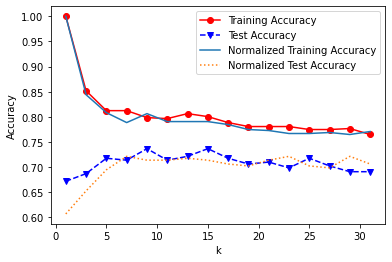

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.random import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##################################################
# Hold-out testing: Training and Test set creation
# Diabetes data
##################################################

data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))
trainAcc_normalized = np.zeros(len(k_range))
testAcc_normalized = np.zeros(len(k_range))


index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)    
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)

    #Data is normalized
    X_train_normalized, X_test_normalized = clf.normalize(X_train, X_test)
    clf.fit(X_train_normalized, Y_train)
    Y_predTrain_normalized = clf.getDiscreteClassification(X_train_normalized)
    Y_predTest_normalized = clf.getDiscreteClassification(X_test_normalized)    
    trainAcc_normalized[index] = accuracy_score(Y_train, Y_predTrain_normalized)
    testAcc_normalized[index] = accuracy_score(Y_test, Y_predTest_normalized)
    
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.plot(k_range,trainAcc_normalized,'-',k_range,testAcc_normalized,':')
plt.legend(['Training Accuracy','Test Accuracy', 'Normalized Training Accuracy','Normalized Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

We can see that both the training and test accuracies of the non-normalized data are very similar compared to the the training and test accuracies of the normalized data. The normalized test accuracy, compared to the non-normalized test accuracy, is worse from k=1 to k=6. The normalized training accuracy is slightly lower than the non-normalized training accuracy.

<ipython-input-1-d66525348ef6>:67: RuntimeWarning: overflow encountered in double_scalars
  distance = distance + abs(x1[i] - x2[i])**self.exp


Text(0, 0.5, 'Accuracy')

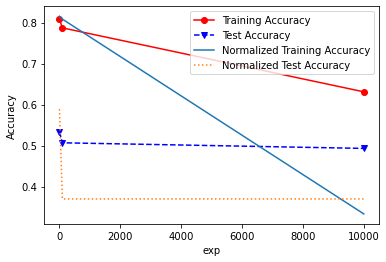

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from numpy.random import random

##################################################
# Hold-out testing: Training and Test set creation
# Glass data
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))
trainAcc_normalized = np.zeros(len(exp_range))
testAcc_normalized = np.zeros(len(exp_range))


index = 0 
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    
    #Data is normalized
    X_train_normalized, X_test_normalized = clf.normalize(X_train, X_test)
    clf.fit(X_train_normalized, Y_train)
    Y_predTrain_normalized = clf.getDiscreteClassification(X_train_normalized)
    Y_predTest_normalized = clf.getDiscreteClassification(X_test_normalized)    
    trainAcc_normalized[index] = accuracy_score(Y_train, Y_predTrain_normalized)
    testAcc_normalized[index] = accuracy_score(Y_test, Y_predTest_normalized)
    
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.plot(exp_range,trainAcc_normalized,'-',exp_range,testAcc_normalized,':')
plt.legend(['Training Accuracy','Test Accuracy', 'Normalized Training Accuracy','Normalized Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')

We can see that both the training and test accuracies of the non-normalized data are better compared to the the training and test accuracies of the normalized data. The normalized test accuracy, compared to the non-normalized test accuracy, has lower accuracy (with around 0.1 less), although both don't improve with the different values of the exp parameter of the Minkowski distance (both are non-decreasing and non-increasing lines). The normalized training accuracy decreases more rapidly than the non-normalized training accuracy.

**Part C**

In [5]:
data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

clf = kNN(k)
clf.fit(X_train, Y_train)
clf.getClassProbs(X_train)

,'build wind float','build wind non-float','vehic wind float',containers,headlamps,tableware
class,0.709677,0.258065,0.032258,0.000000,0.000000,0.000000
class,0.129032,0.387097,0.000000,0.225806,0.161290,0.096774
class,0.322581,0.580645,0.096774,0.000000,0.000000,0.000000
class,0.032258,0.129032,0.000000,0.129032,0.580645,0.129032
class,0.193548,0.677419,0.129032,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
class,0.032258,0.129032,0.000000,0.096774,0.612903,0.129032
class,0.548387,0.193548,0.193548,0.000000,0.032258,0.032258
class,0.193548,0.677419,0.129032,0.000000,0.000000,0.000000
class,0.677419,0.322581,0.000000,0.000000,0.000000,0.000000


In [6]:
data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

clf = kNN(k)
clf.fit(X_train, Y_train)
clf.getClassProbs(X_train)

,tested_negative,tested_positive
class,0.935484,0.064516
class,0.709677,0.290323
class,0.612903,0.387097
class,0.903226,0.096774
class,0.774194,0.225806
...,...,...
class,0.451613,0.548387
class,0.774194,0.225806
class,0.870968,0.129032
class,0.838710,0.161290


**Part D**

In [7]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

Text(0, 0.5, 'Mean Absolute Error')

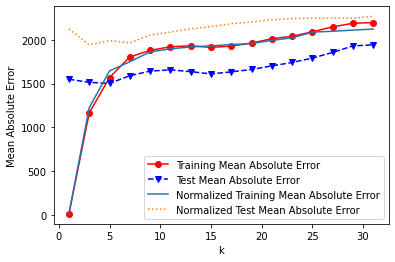

In [9]:
import numpy as np
import pandas as pd

from numpy.random import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainMeanAbsError = np.zeros(len(k_range))
testMeanAbsError = np.zeros(len(k_range))
trainMeanAbsError_normalized = np.zeros(len(k_range))
testMeanAbsError_normalized = np.zeros(len(k_range))


index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train) 
    Y_predTrain = clf.getPrediction(X_train)
    Y_predTest = clf.getPrediction(X_test)    
    trainMeanAbsError[index] = mean_absolute_error(Y_train, Y_predTrain)
    testMeanAbsError[index] = mean_absolute_error(Y_test, Y_predTest)

    #Data is normalized
    X_train_normalized, X_test_normalized = clf.normalize(X_train, X_test)
    clf.fit(X_train_normalized, Y_train)
    Y_predTrain_normalized = clf.getPrediction(X_train_normalized)
    Y_predTest_normalized = clf.getPrediction(X_test_normalized)    
    trainMeanAbsError_normalized[index] = mean_absolute_error(Y_train, Y_predTrain_normalized)
    testMeanAbsError_normalized[index] = mean_absolute_error(Y_test, Y_predTest_normalized)
    
    index += 1
     

plt.plot(k_range,trainMeanAbsError,'ro-',k_range,testMeanAbsError,'bv--')
plt.plot(k_range,trainMeanAbsError_normalized,'-',k_range,testMeanAbsError_normalized,':')
plt.legend(['Training Mean Absolute Error','Test Mean Absolute Error', 'Normalized Training Mean Absolute Error','Normalized Test Mean Absolute Error'])
plt.xlabel('k')
plt.ylabel('Mean Absolute Error')

We can see that the normalized training mean absolute error and the non-normalized training mean absolute error are very similar. However, the normalized test mean absolute error, compared to the non-normalized test mean absolute error, is higher, although both errors have very similar patterns of increasing. After k=5, all errors are very high and increasing above 1500.